In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import h, m_e, M_sun, c
from agnpy.emission_regions import Blob
from agnpy.targets import SSDisk, SphericalShellBLR, RingDustTorus
from agnpy.absorption import Absorption, sigma
from agnpy.compton import cos_psi
import matplotlib.pyplot as plt

In [2]:
mec2 = m_e.to("erg", equivalencies=u.mass_energy())
# equivalency to transform frequencies to energies in electron rest mass units
epsilon_equivalency = [
    (u.Hz, u.Unit(""), lambda x: h.cgs * x / mec2, lambda x: x * mec2 / h.cgs)
]

In [3]:
# define the blob
spectrum_norm = 1e47 * u.erg
parameters = {"p": 2.8, "gamma_min": 10, "gamma_max": 1e6}
spectrum_dict = {"type": "PowerLaw", "parameters": parameters}
R_b = 1e16 * u.cm
B = 0.56 * u.G
z = 0
delta_D = 40
Gamma = 40
blob = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)

In [4]:
L_disk = 2 * 1e46 * u.Unit("erg s-1")
csi_line = 0.024
R_line = 1e17 * u.cm
blr = SphericalShellBLR(L_disk, csi_line, "Lyalpha", R_line)

In [5]:
# compute tau
r = 1.1 * 1e16 * u.cm
absorption_blr = Absorption(blob, blr, r=r)
E = np.logspace(0, 5) * u.GeV
nu = E.to("Hz", equivalencies=u.spectral())
tau_blr = absorption_blr.tau(nu)

/home/cosimo/software/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [6]:
# array of sampled taus
sampled_tau = np.loadtxt(
    f"agnpy/tests/sampled_taus/tau_blr_lyman_alpha_figure_14_finke_2016.txt", delimiter=",", comments="#",
)
E_ref = sampled_tau[:, 0] * u.GeV
taus_ref = sampled_tau[:, 1] 

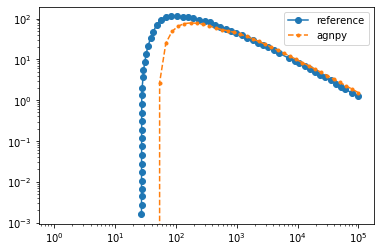

In [7]:
plt.loglog(E_ref, taus_ref, ls="-", marker="o", label="reference")
plt.loglog(E, tau_blr, ls="--", marker=".", label="agnpy")
plt.legend()